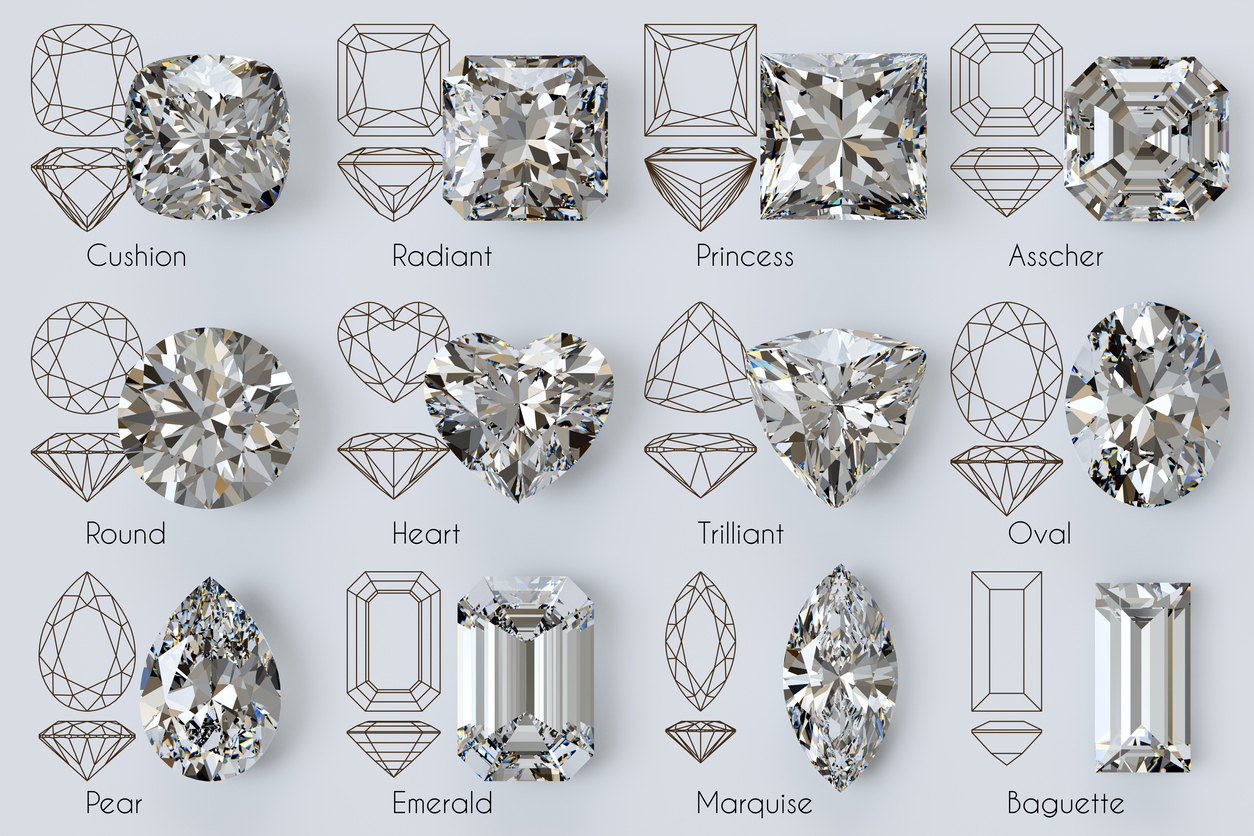

This classic dataset contains the prices and other attributes of almost 54,000 diamonds. It's a great dataset for beginners learning to work with data analysis and visualization.

Content
price price in US dollars (\$326--\$18,823)

carat weight of the diamond (0.2--5.01)

cut quality of the cut (Fair, Good, Very Good, Premium, Ideal)

color diamond colour, from J (worst) to D (best)

clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

x length in mm (0--10.74)

y width in mm (0--58.9)

z depth in mm (0--31.8)

depth total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

table width of top of diamond relative to widest point (43--95)

# Data prepration

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from scipy import stats
from scipy.stats import norm
%matplotlib inline

In [33]:
# Read and load Data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [34]:
train.isna().sum()

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [35]:
test.isna().sum()

Id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

In [36]:
train.shape

(43152, 11)

In [37]:
test.shape

(10788, 10)

In [38]:
train.head()

,Id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,1.06,Ideal,I,SI2,61.8,57.0,4270,6.57,6.60,4.07
1,2,1.51,Premium,G,VVS2,60.9,58.0,15164,7.38,7.42,4.51
2,3,0.32,Ideal,F,VS2,61.3,56.0,828,4.43,4.41,2.71
3,4,0.53,Ideal,G,VS2,61.2,56.0,1577,5.19,5.22,3.19
4,5,0.70,Premium,H,VVS2,61.0,57.0,2596,5.76,5.72,3.50


In [39]:
train.drop('Id',axis=1,inplace=True)
test.drop('Id',axis=1,inplace=True)

In [40]:
train.drop_duplicates(inplace=True)

In [41]:
quality_map = {'Fair':1, 'Good':2, 'Very Good':3, 'Premium':4, 'Ideal':5}
color_map = {'D':7, 'E':6, 'F':5, 'G':4, 'H':3,'I':2,'J':1}
clarity_map = {'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5,'VVS2':6,'VVS1':7,'IF':8}

train['cut'] = train.cut.map(quality_map)
train['color'] = train.color.map(color_map)
train['clarity'] = train.clarity.map(clarity_map)
test['cut'] = test.cut.map(quality_map)
test['color'] = test.color.map(color_map)
test['clarity'] = test.clarity.map(clarity_map)

In [42]:
train.describe()

,carat,cut,color,clarity,depth,table,price,x,y,z
count,43055.000000,43055.000000,43055.000000,43055.000000,43055.000000,43055.000000,43055.000000,43055.000000,43055.000000,43055.000000
mean,0.797752,3.904657,4.406178,4.045453,61.746373,57.459798,3930.016235,5.731555,5.735063,3.538528
std,0.473198,1.114915,1.701862,1.649152,1.435066,2.234325,3984.939986,1.120732,1.148389,0.707922
min,0.200000,1.000000,1.000000,1.000000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,3.000000,3.000000,3.000000,61.000000,56.000000,948.000000,4.710000,4.720000,2.910000
50%,0.700000,4.000000,4.000000,4.000000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,5.000000,6.000000,5.000000,62.500000,59.000000,5312.500000,6.540000,6.540000,4.040000
max,5.010000,5.000000,7.000000,8.000000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [43]:
train.loc[train[(train['z']==0)|(train['z']>15)].index,'z']=train['z'].median()
train.loc[train[train['x']==0].index,'x']=train['x'].median()
train.loc[train[(train['y']==0)|(train['y']>15)].index,'y']=train['y'].median()
test.loc[test[(test['z']==0)|(test['z']>15)].index,'z']=test['z'].median()
test.loc[test[test['x']==0].index,'x']=test['x'].median()
test.loc[test[(test['y']==0)|(test['y']>15)].index,'y']=test['y'].median()

In [44]:
train['size']=train['x']*train['y']*train['z']
test['size']=test['x']*test['y']*test['z']
train.drop(columns=['x','y','z'],axis=1,inplace=True)
test.drop(columns=['x','y','z'],axis=1,inplace=True)

In [45]:
train.head()

,carat,cut,color,clarity,depth,table,price,size
0,1.06,5,2,2,61.8,57.0,4270,176.483340
1,1.51,4,4,6,60.9,58.0,15164,246.965796
2,0.32,5,5,4,61.3,56.0,828,52.943373
3,0.53,5,4,4,61.2,56.0,1577,86.422842
4,0.70,4,3,6,61.0,57.0,2596,115.315200


In [46]:
test.head()

,carat,cut,color,clarity,depth,table,size
0,0.34,5,4,6,61.1,57.0,55.686400
1,0.71,4,6,4,62.7,58.0,116.719456
2,0.44,3,2,5,62.8,56.0,71.889720
3,0.81,4,6,2,60.1,59.0,134.037855
4,0.40,5,4,7,61.2,56.0,66.435840


# Data visualization

In [47]:
num = train[["carat", "depth", "table", "price", "size"]]

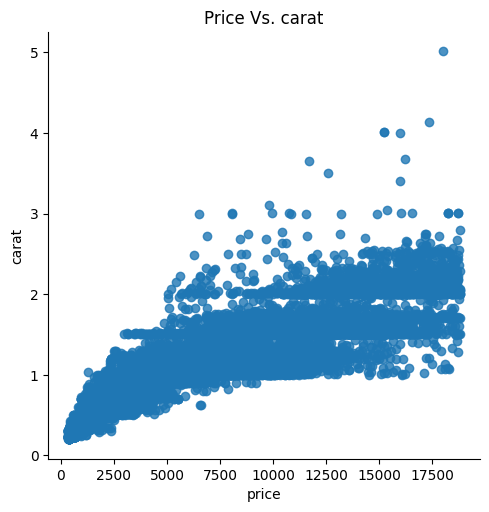

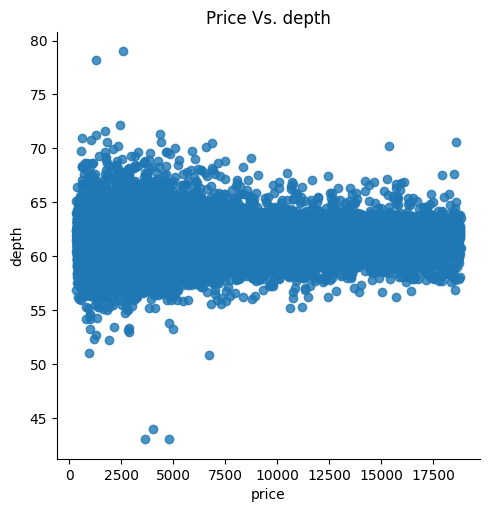

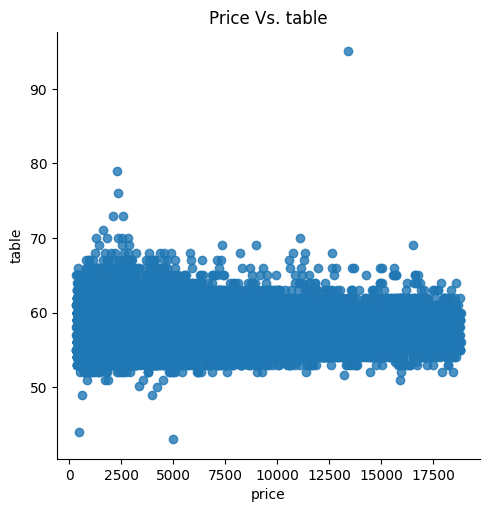

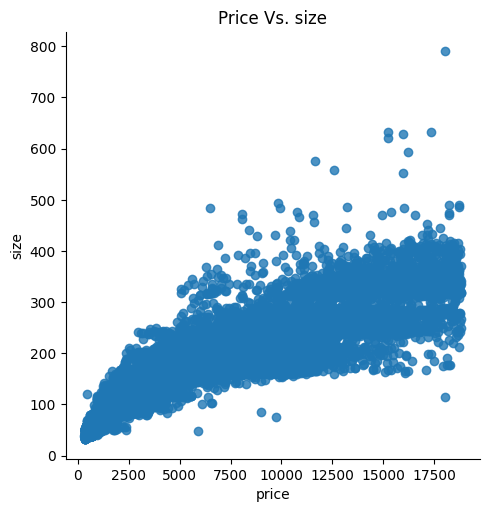

In [48]:
for col in num.columns:
    if col == "price":
        continue
    
    ax = sns.lmplot(data=num, x = 'price', y=col)
    plt.title(f"Price Vs. {col}")
    plt.show()

<Axes: >

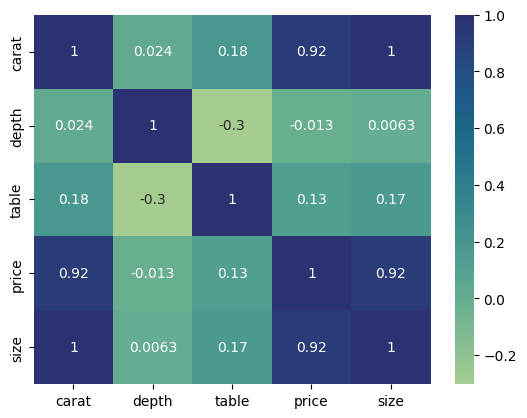

In [49]:
sns.heatmap(num.corr(), annot=True, cmap = "crest")

<Axes: xlabel='cut', ylabel='price'>

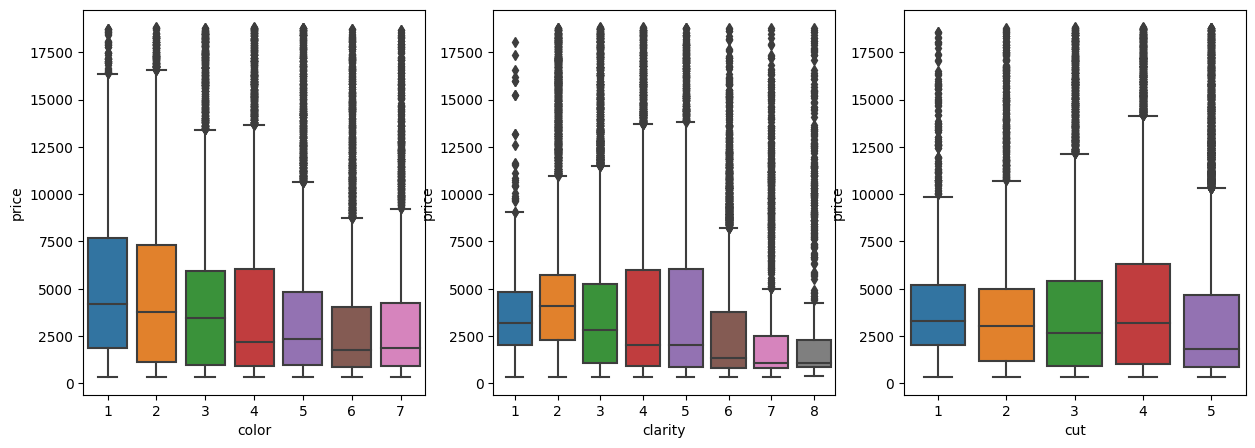

In [50]:
fig, axes = plt.subplots(1,3, figsize=(15, 5))

sns.boxplot(data = train, x = "color", y = "price", ax = axes[0])
sns.boxplot(data = train, x = "clarity", y = "price", ax = axes[1])
sns.boxplot(data = train, x = "cut", y = "price", ax = axes[2])

Text(0.5, 1.0, 'Price & Size rel')

<Figure size 1000x500 with 0 Axes>

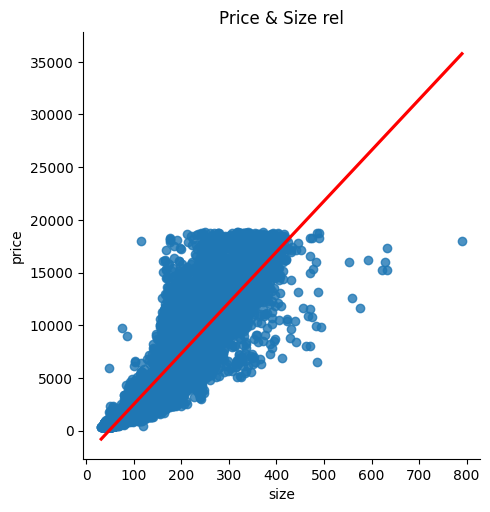

In [51]:
figure = plt.figure(figsize=(10,5))
sns.lmplot(x='size', y='price', data=train, line_kws={'color': 'red'})

# Set plot title
plt.title('Price & Size rel')

# Model building

In [52]:
x = train.drop(columns='price')
y = train['price']

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

In [54]:
x_train

,carat,cut,color,clarity,depth,table,size
41997,1.00,4,4,1,59.0,60.0,159.411274
6571,1.21,5,4,7,61.0,57.0,200.434311
13652,1.04,5,4,7,62.2,55.0,170.426592
13349,0.71,4,7,7,58.8,58.0,117.719896
24040,1.05,5,5,3,61.8,57.0,171.578862
...,...,...,...,...,...,...,...
7816,1.21,3,2,3,61.8,59.0,191.297700
32567,1.31,5,2,4,61.7,55.0,216.195000
5192,1.64,5,2,4,62.5,56.0,269.047552
12179,0.31,3,4,7,63.5,57.0,51.016060


In [55]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators= 100, random_state=0)
rfr.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [56]:
y_pred = rfr.predict(x_test)
y_pred

array([ 566.89766667, 3557.49      , 2024.53      , ..., 5288.03      ,
       2836.488     ,  506.89      ])

In [67]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print("R2 score:",r2_score(y_test, y_pred))
print("----------------------")
print("MSE:",mean_squared_error(y_test, y_pred))

R2 score: 0.9817041565717374
----------------------
MSE: 299756.9605215157


In [59]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [61]:
yLr_pred = lr.predict(x_test)
yLr_pred

array([-685.81893315, 4459.48566503, 3346.67372709, ..., 6194.40936862,
       3182.83561291,  411.44621847])

In [65]:
print("R2 score:",r2_score(y_test, yLr_pred))
print("----------------------")
print("MSE:",mean_squared_error(y_test, yLr_pred))

R2 score: 0.9080801875649535
----------------------
MSE: 1506003.4644084105


In [71]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

xg_reg = xgb.XGBRegressor(objective='reg:squarederror',learning_rate =0.01,n_estimators=2000, booster = 'gbtree', 
                                     max_depth=8,min_child_weight=10 ,base_score=0.8,
                                     gamma=0, subsample=0.7,
                                     colsample_bytree=0.7,nthread=4,reg_lambda=0.0571,
                                     scale_pos_weight=1,seed=27, random_state=7,
                                     reg_alpha=0.006)

xg_reg.fit(x_train, y_train)

yXGB_preds = xg_reg.predict(x_test)
yXGB_preds

array([ 402.16098, 3342.9456 , 2155.6443 , ..., 5408.204  , 2563.7026 ,
        577.7959 ], dtype=float32)

In [72]:
print("R2 score:",r2_score(y_test, yXGB_preds))
print("----------------------")
print("MSE:",mean_squared_error(y_test, yXGB_preds))

R2 score: 0.9826134519643376
----------------------
MSE: 284859.1710771101
